import pandas as pd
import glob
interesting_files = glob.glob("*.csv")
df_list = []
for filename in sorted(interesting_files):
    df_list.append(pd.read_csv(filename))
full_df = pd.concat(df_list)

full_df.to_csv('output.csv')

## Importing required lib & modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('nBagg')
import plotly.express as px
import seaborn as sns
%matplotlib inline
import plotly.express as px
from wordcloud import WordCloud,STOPWORDS

In [2]:
data = pd.read_csv('COMBINED_Swiggy.csv')

In [3]:
#data

## Creating and Dropping columns

In [4]:
data['ratings'] =  data.ratt.str.split('•').str[0]
data['time'] =  data.ratt.str.split('•').str[1]
data['price_for2'] =  data.ratt.str.split('•').str[2]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11987 entries, 0 to 11986
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   url              11987 non-null  object
 1   Restaurant_Name  11987 non-null  object
 2   cuisine          11987 non-null  object
 3   ratt             11987 non-null  object
 4   locality         11987 non-null  object
 5   ratings          11987 non-null  object
 6   time             11987 non-null  object
 7   price_for2       11987 non-null  object
dtypes: object(8)
memory usage: 749.3+ KB


In [6]:
data = data.drop(['url', 'ratt'], axis = 1)

In [7]:
#data

## Filtering

In [8]:
data.ratings=data.ratings.str.replace('[--]','0')
data.price_for2=data.price_for2.str.replace('[₹,FOR,TWO, , ]','')

In [9]:
data["ratings"]=data["ratings"].apply(float)

data["price_for2"]=data["price_for2"].apply(float)

In [10]:
data['Restaurant_Name'] = data['Restaurant_Name'].str.title()

In [11]:
#data

## Creating new data-sets

In [12]:
top_10 = data[(data.locality == 'VASHI')|(data.locality == 'BANDRA_WEST')|(data.locality == 'THANE')|(data.locality == 'MALAD_KAN_WEST')|(data.locality == 'ANDHERI_WEST')|(data.locality == 'POWAI')|(data.locality == 'BORIVALI')|(data.locality == 'ANDHERI_EAST')|(data.locality == 'LOWER_PAREL_WORLI')|(data.locality == 'CHEMBUR')]
top_10.reset_index(inplace = True, drop = True)

In [13]:
#top_10

In [14]:
valid_data = top_10[(top_10.ratings > 1.0)]

In [15]:
price_dummy = valid_data[(valid_data.price_for2 < 3000)]

In [16]:
vashi = data[(data.locality == 'VASHI')]

In [17]:
#valid_data

In [18]:
top_10 = top_10.sort_values(['locality', 'price_for2'])

In [19]:
top_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4688 entries, 689 to 391
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Restaurant_Name  4688 non-null   object 
 1   cuisine          4688 non-null   object 
 2   locality         4688 non-null   object 
 3   ratings          4688 non-null   float64
 4   time             4688 non-null   object 
 5   price_for2       4688 non-null   float64
dtypes: float64(2), object(4)
memory usage: 256.4+ KB


In [19]:
top_10.locality.unique()

array(['ANDHERI_EAST', 'ANDHERI_WEST', 'BANDRA_WEST', 'BORIVALI',
       'CHEMBUR', 'LOWER_PAREL_WORLI', 'MALAD_KAN_WEST', 'POWAI', 'THANE',
       'VASHI'], dtype=object)

In [20]:
#top_10

## Importing To Excel

In [21]:
#data.to_excel(r'COMBINED_Swig_data.xlsx', index = False)

## Visualization

In [22]:
data.locality.unique()

array(['CBD_BELAPUR', 'KHARGHAR', 'MAROL', 'THANE_PANCHPAKHADI', 'VASHI',
       'AIROLI', 'ANDHERI_EAST', 'ANDHERI_WEST', 'BANDRA_WEST', 'BHANDUP',
       'BHAYANDAR', 'BORIVALI', 'BYCULLA', 'CHEMBUR', 'CHOWPATTY',
       'DAHISAR_EAST', 'DOMBIVLI', 'COLOBA', 'GHATKOPAR', 'JOG_GOR_WEST',
       'JOG_GOR_EAST', 'JUHU', 'KAMOTHE', 'KURLA', 'LOWER_PAREL_WORLI',
       'MAHALAXMI_MALABAR_HILL', 'MAHIM_DADAR_WEST', 'MALAD_KAN_EAST',
       'MALAD_KAN_WEST', 'MATUNGA', 'MIRA_ROAD', 'NERUL', 'PANVEL',
       'PAREL', 'POWAI', 'SANTACRUZ_EAST_BANDRA_EAST', 'SION_BHAKTI_PARK',
       'THANE_HIRANANDANI_ESTATE', 'THANE', 'VASAI', 'VILE_PARLE',
       'VIRAR'], dtype=object)

<Figure size 1440x1152 with 0 Axes>

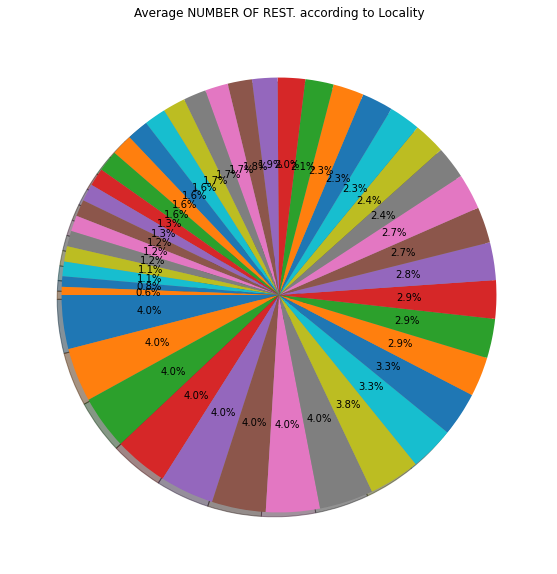

In [23]:
plt.figure(figsize=(20,16))
ax=data.locality.value_counts()
#labels = ['Baner',  'Wakad', 'Hinjewadi', 'Hinjewadi_phase3'] labels= labels,
#explode = (0.1, 0.05, 0.05,0.2) explode=explode,
fig1, ax1 = plt.subplots(figsize=(10,10))
plt.title("Average NUMBER OF REST. according to Locality")
ax1.pie(ax,  shadow=True,autopct='%1.1f%%' ,startangle=180,)
plt.rcParams['font.size'] = 20

plt.show()

In [24]:
plt.figure(figsize=(15,10))
f = data.locality.value_counts()
fig = px.pie(data, values=f, names=f.index, width=950, height=1000,title="Number of Restaurants according to Locality(in %)")
fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green"
)
fig.show()

<Figure size 1080x720 with 0 Axes>

In [25]:
plt.figure(figsize=(15,10))
f = vashi.ratings.value_counts()
fig = px.pie(data, values=f, names=f.index, width=950, height=1000,title="Vashi locality ratings(in %)")
fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green"
)
fig.show()

<Figure size 1080x720 with 0 Axes>

In [32]:
plt.figure(figsize=(15,10))
f = top_10.price_for2.value_counts()
fig = px.pie(data, values=f, names=f.index, width=950, height=1000,title="Top 10 average price for 2(in %)")
fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green"
)
fig.show()

<Figure size 1080x720 with 0 Axes>

In [27]:
plt.figure(figsize=(10,10))
ax = valid_data.plot(kind="scatter", x='Restaurant_Name', y='ratings', color="cyan",label="Ratings",figsize=(10, 10))
data.plot( kind="scatter",x='Restaurant_Name', y='price_for2', color="b",label="Price_for_two", ax=ax)
ax.set_xlabel("Number of Restuarants")
ax.set_ylabel("Ratings & Price_for_2")
plt.show()

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

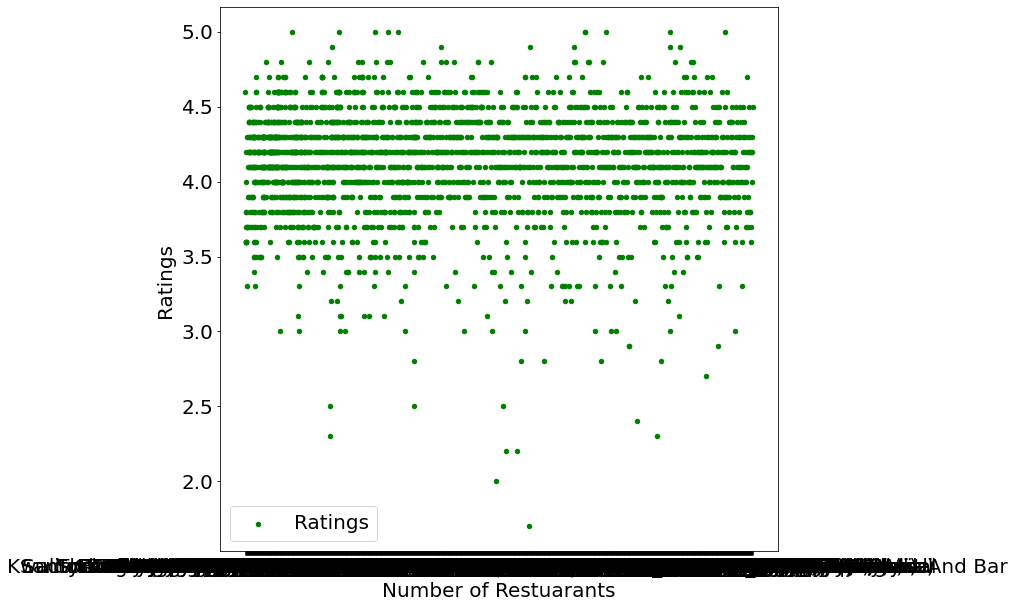

In [28]:
plt.figure(figsize=(10,10))
ax = valid_data.plot(kind="scatter", x='Restaurant_Name', y='ratings', color="g",label="Ratings",figsize=(10, 10))
#combine.plot( kind="scatter",x='name', y='price_for2', color="y",label="Delivery_Reviews", ax=ax)
ax.set_xlabel("Number of Restuarants")
ax.set_ylabel("Ratings ")
plt.show()

## ***add

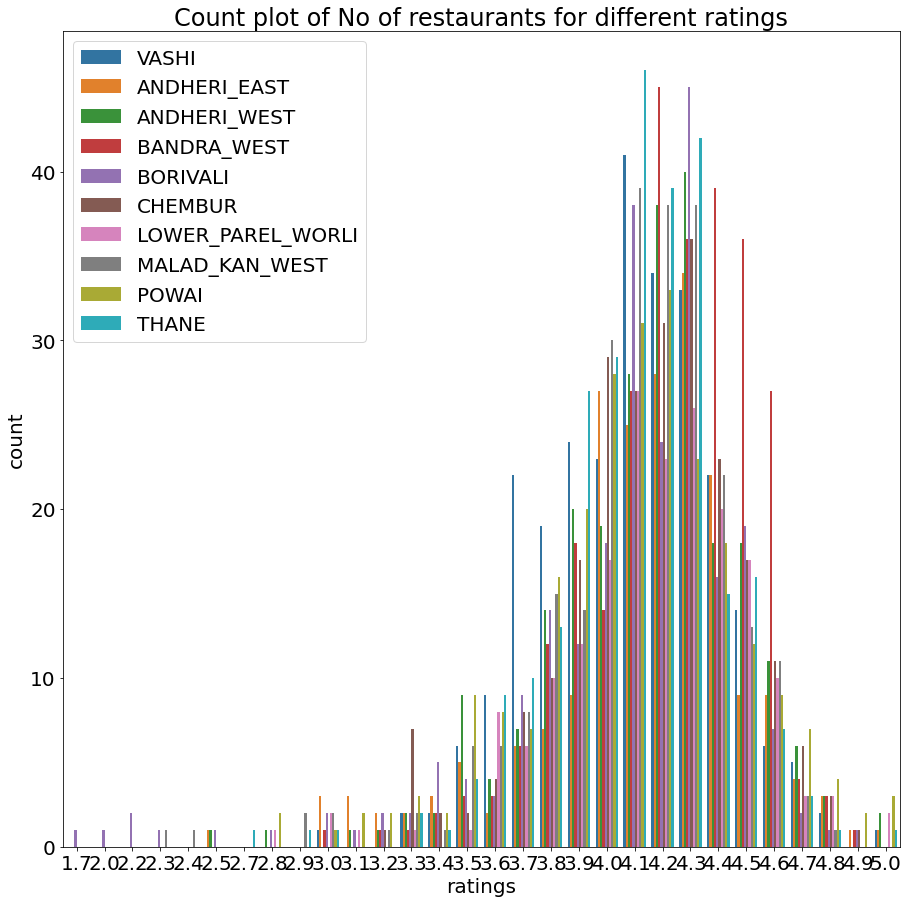

In [29]:
fig = plt.gcf()
sns.countplot(data = valid_data, hue = 'locality', x = 'ratings').legend(loc=2)
plt.title('Count plot of No of restaurants for different ratings')
fig.set_size_inches(15, 15)
plt.show()

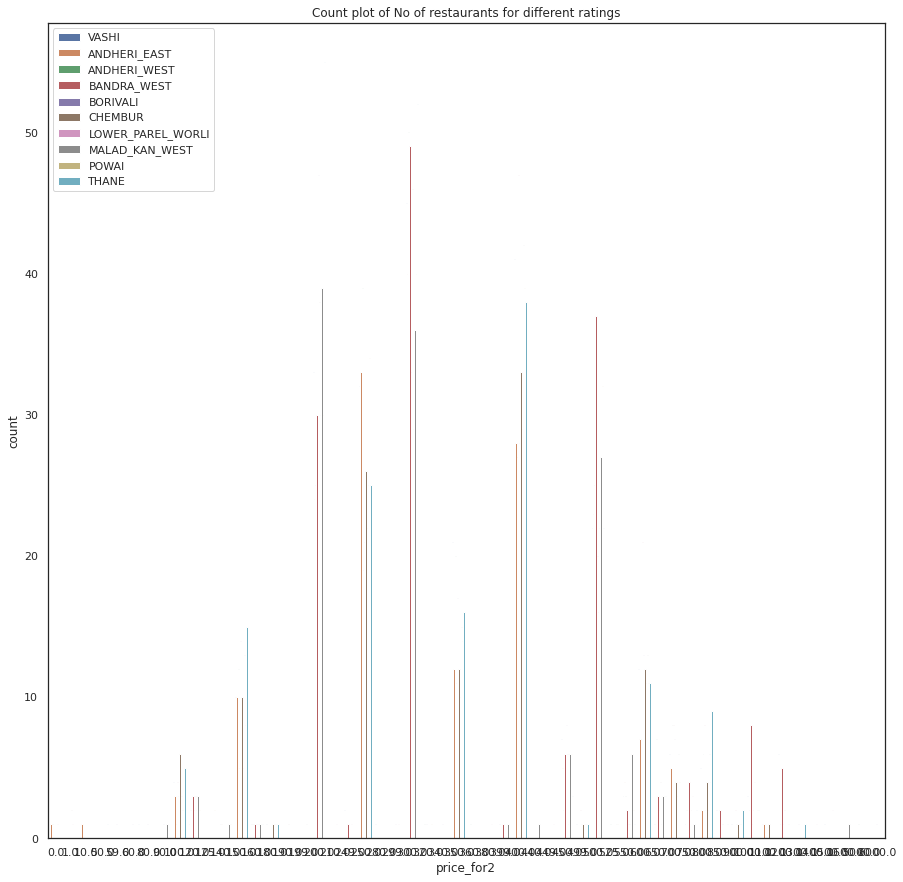

In [29]:
fig = plt.gcf()
sns.countplot(data = valid_data, hue = 'locality', x = 'price_for2').legend(loc=2)
plt.title('Count plot of No of restaurants for different ratings')
fig.set_size_inches(15, 15)
plt.show()

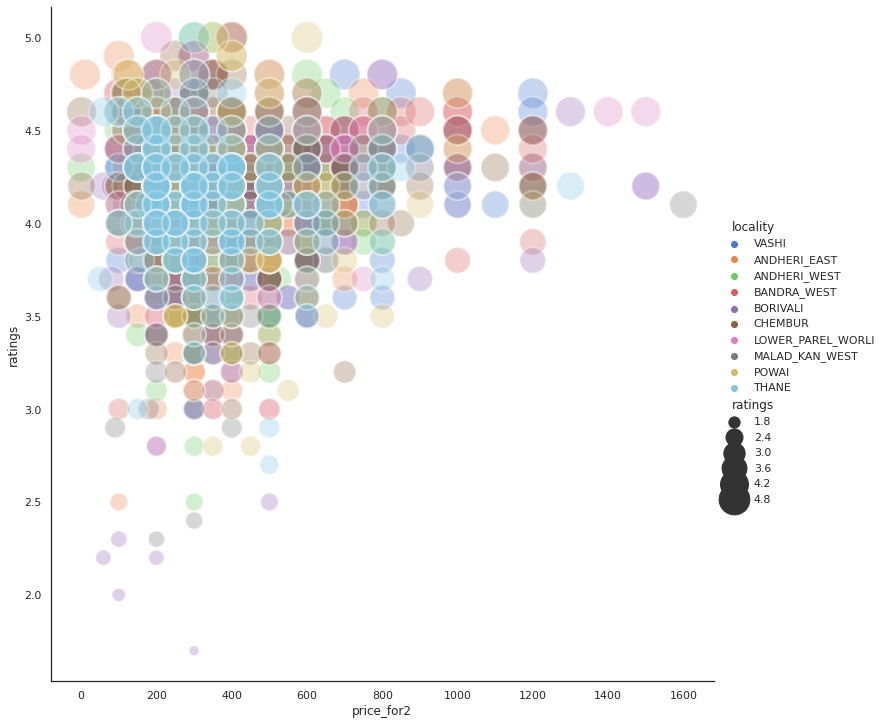

In [41]:

import seaborn as sns
sns.set_theme(style="white")

# Load the example mpg dataset
#mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="price_for2", y="ratings", hue="locality", size="ratings",
            sizes=(100, 1000), alpha=.3, palette="muted",
            height=10, data=price_dummy)

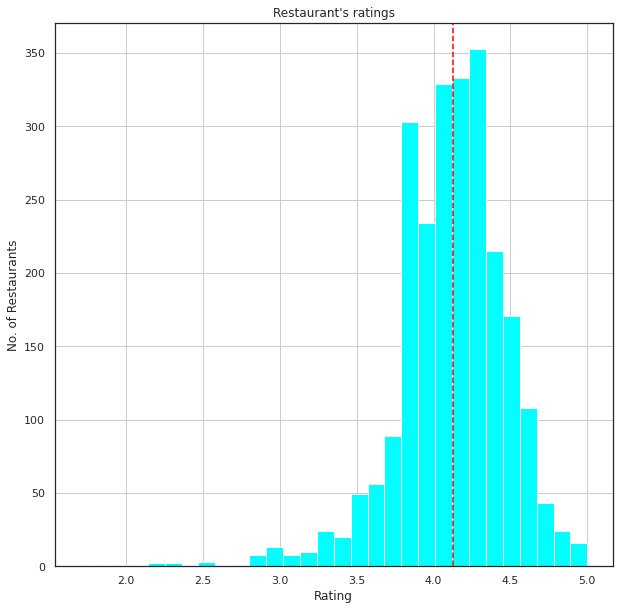

4.125982623086484


In [37]:
plt.figure(figsize=(10,10))
valid_data.ratings.hist(color='cyan',bins=30)
plt.axvline(x=valid_data.ratings.mean(),color='red',ls='--')
plt.title("Restaurant's ratings")
plt.xlabel('Rating')
plt.ylabel('No. of Restaurants')
plt.show()
print(valid_data.ratings.mean())


In [33]:
plt.figure(figsize=(15,10))
f = data.price_for2.value_counts()
fig = px.pie(data, values=f, names=f.index, width=950, height=1000,title="Average cost for two person(in %)")
fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green"
)
fig.show()

<Figure size 1080x720 with 0 Axes>

In [34]:
plt.figure(figsize=(15,10))
f = top_10.ratings.value_counts()
fig = px.pie(data, values=f, names=f.index, width=950, height=1000,title="Average cost for two person(in %)")
fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green"
)
fig.show()

<Figure size 1080x720 with 0 Axes>

In [35]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(
    x=top_10['price_for2'], y=top_10['ratings'],
    mode='markers')
])

fig.show()

In [36]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import math

# Load data, define hover text and bubble size
#data = px.data.gapminder()
#df_2007 = data[data['year']==2007]
#df_2007 = df_2007.sort_values(['continent', 'country'])

hover_text = []
bubble_size = []

for index, row in valid_data.iterrows():
    hover_text.append(('Country: {Restaurant_Name}<br>'+
                      'Price: {price_for2}<br>'+
                      'Ratings: {ratings}<br>'+
                      'Locality: {locality}').format(Restaurant_Name=row['Restaurant_Name'],
                                            price_for2=row['price_for2'],
                                            ratings=row['ratings'],
                                            locality=row['locality']))
    bubble_size.append(math.sqrt(row['price_for2']))

valid_data['text'] = hover_text
valid_data['size'] = bubble_size
sizeref = 2.*max(valid_data['size'])/(100**2)

# Dictionary with dataframes for each continent
locality_names = ['ANDHERI_EAST', 'ANDHERI_WEST', 'BANDRA_WEST', 'BORIVALI','CHEMBUR', 'LOWER_PAREL_WORLI', 'MALAD_KAN_WEST', 'POWAI', 'THANE','VASHI']
locality_data = {locality:valid_data.query("locality == '%s'" %locality)
                              for locality in locality_names}

# Create figure
fig = go.Figure()

for locality_name, locality in locality_data.items():
    fig.add_trace(go.Scatter(
        x=locality['price_for2'], y=locality['ratings'],
        name=locality_name, text=locality['text'],
        marker_size=locality['size'],
        ))

# Tune marker appearance and layout
fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=2))

fig.update_layout(
    title='Rattings v. Price for 2, top 10 locations',
    xaxis=dict(
        title='Price for two (approx)',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Ratings (0-5)',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig.show()


## ***add

In [37]:
import plotly.express as px
#df = px.data.iris() , hover_data=['petal_width']
fig = px.scatter(top_10, x="price_for2", y="ratings", color="locality",
                 size='ratings')
fig.show()

## ***add

In [38]:
import plotly.express as px
#df = px.data.iris() , hover_data=['petal_width']
fig = px.scatter(data, x="price_for2", y="ratings", color="locality",
                 size='ratings')
fig.show()

In [39]:
import plotly.express as px
#df = px.data.iris() , hover_data=['petal_width']
fig = px.scatter(top_10, x="Restaurant_Name", y="ratings", color="locality",
                 size='ratings')
fig.show()

In [40]:
dump = top_10[(top_10.price_for2 < 2000)]

In [41]:
import plotly.express as px
#df = px.data.iris() , hover_data=['petal_width']
fig = px.scatter(dump, x="price_for2", y="Restaurant_Name", color="locality",
                 size='ratings')
fig.show()

In [33]:
cuisines=[j.lower().strip() for i in data.cuisine for j in i.split(',')]

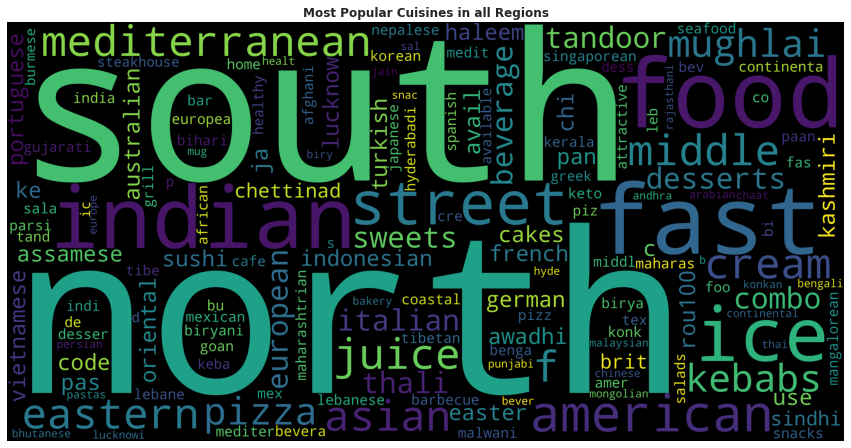

In [35]:
plt.figure( figsize=(15,10) )
cuisines_set=set(cuisines)
cuisines_wc=', '.join(cuisines_set)
wc=WordCloud(stopwords=STOPWORDS,max_words=len(cuisines_wc),height =3000,width = 6000)
wc.generate(cuisines_wc)  

plt.imshow(wc,interpolation='bilinear')
plt.title('Most Popular Cuisines in all Regions',weight='bold')
plt.axis("off")
plt.imshow(wc)
plt.show()